In [2]:
%load_ext autoreload
%autoreload 2

import crispr as cr
import scanpy as sc
import pertpy as pt
import scipy
import numpy as np

col_guide_rna, col_num_umis, col_condition = "guide", "num_umis", "target"
col_condition = "target_gene"
feature_split, guide_split = "|", "g"
key_control = "Control"
kws_pg = dict(feature_split=feature_split, guide_split=guide_split,
              key_control_patterns=["NT"], remove_multi_transfected=True,
              max_pct_control_drop=None, min_pct_avg_n=None, min_n=5,
              min_n_target_control_drop=None, min_pct_dominant="highest")
kwargs = dict(assay="rna", assay_gdo="gdo", assay_protein="adt",
              col_batch="orig.ident", col_subject_id="replicate",
              col_sample_id="MULTI_ID", col_condition=col_condition,
              col_num_umis=col_num_umis, col_perturbed="perturbed",
              col_cell_type="leiden", col_guide_rna=col_guide_rna,
              key_control=key_control, key_treatment="KO")
adata = pt.data.papalexi_2021()
adata.mod["gdo"].X = scipy.sparse.csr_matrix(adata.mod["gdo"].X.A - 1)
self = cr.Crispr(adata, **kwargs, kws_process_guide_rna=kws_pg)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Unused keyword arguments: {'col_batch': 'orig.ident', 'col_subject_id': 'replicate'}.



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'assay_gdo': 'gdo'}.

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id="MULTI_ID"
col_batch="MULTI_ID"
col_subject=None
col_condition="target_gene"
col_num_umis="num_umis"
key_control="Control"
key_treatment="KO"


<<< LOADING OBJECT >>>


<<< Joining gdo (gRNA) & rna assay data >>>
Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/crispr/crispr/processing/preprocessing.py", line 146, in create_object
    adata.obs_names_make_unique()
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/mudata/_core/mudata.py", line 974, in obs_names_make_unique
    self._obs.index = obs_names
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/pandas/core/g

In [33]:
cols = [self._columns[x] + "_original" for x in [
    "col_guide_rna", "col_num_umis"]] + [self._columns["col_condition"]]
guides = self.rna.obs[cols + ["gene_target"]].replace(
    "NT", self._keys["key_control"]).copy()
guides.columns = cols[:-1] + ["us", "them"]
print(guides[guides.us != guides.them])
print(guides)

Empty DataFrame
Columns: [guide_original, num_umis_original, us, them]
Index: []

In [37]:
self.rna.obs[["nCount_GDO", self._columns["col_num_umis"]]]

nCount_GDO  \
index                                 
rna:l1_AAACCTGAGCCAGAAC       576.0   
rna:l1_AAACCTGAGTGGACGT       190.0   
rna:l1_AAACCTGCATGAGCGA       212.0   
rna:l1_AAACCTGTCTTGTCAT       243.0   
rna:l1_AAACGGGAGAACAACT       198.0   
...                             ...   
rna:l8_TTTGTCAGTAGGCATG       118.0   
rna:l8_TTTGTCAGTCACTTCC       290.0   
rna:l8_TTTGTCAGTTCCACAA       267.0   
rna:l8_TTTGTCATCACGCATA       202.0   
rna:l8_TTTGTCATCTGTACGA       234.0   

                                                         num_umis_original  
index                                                                       
rna:l1_AAACCTGAGCCAGAAC  2.0|3.0|1.0|1.0|2.0|4.0|2.0|7.0|1.0|3.0|3.0|43...  
rna:l1_AAACCTGAGTGGACGT               1.0|2.0|66.0|4.0|2.0|1.0|1.0|1.0|1.0  
rna:l1_AAACCTGCATGAGCGA       1.0|1.0|1.0|1.0|1.0|4.0|1.0|1.0|88.0|1.0|1.0  
rna:l1_AAACCTGTCTTGTCAT  1.0|119.0|1.0|1.0|1.0|2.0|1.0|1.0|1.0|1.0|1.0|2.0  
rna:l1_AAACGGGAGAACAACT  1.0|1.0|1.0|1.0|2.0|71.0|1.0|1.0|1.0|1.0|1.0|1...  
...                                                                    ...  
rna:l8_TTTGTCAGTAGGCATG                                            6.0|1.0  
rna:l8_TTTGTCAGTCACTTCC                                  176.0|1.0|1.0|1.0  
rna:l8_TTTGTCAGTTCCACAA                                          155.0|1.0  
rna:l8_TTTGTCATCACGCATA                                       2.0|88.0|1.0  
rna:l8_TTTGTCATCTGTACGA                              1.0|1.0|1.0|119.0|1.0  

[17573 rows x 2 columns]

# Processing


Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'MULTI_ID', 'col_subject': None, 'col_condition': 'target_gene', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene', 'col_perturbed': 'perturbed', 'col_guide_rna': 'guide', 'col_guide_split': 'guide_split'}




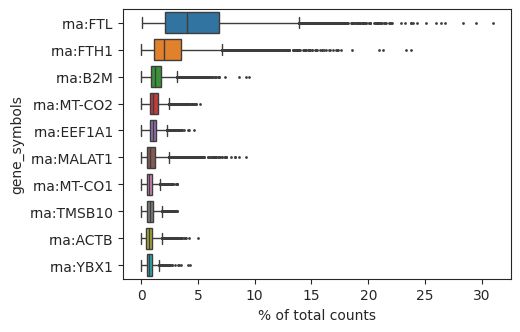



Cell Counts: Initial


Observations: 20715



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, name]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'guide_original' as categorical
... storing 'num_umis_original' as categorical
... storing 'guide' as categorical
... storing 'num_umis' as categorical
... storing 'target_gene' as categorical
... storing 'guide_split' as categorical
... storing 'perturbed' as categorical


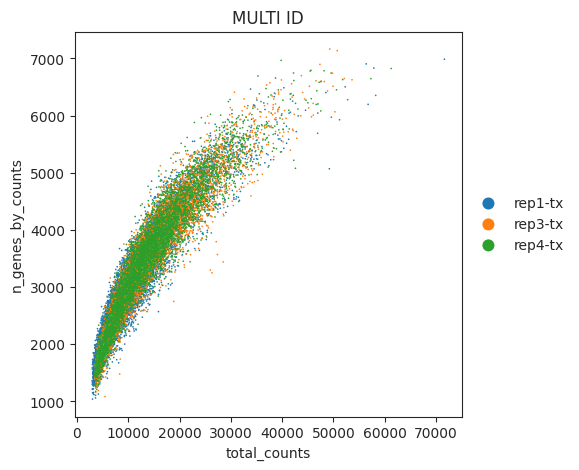

Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/crispr/crispr/processing/preprocessing.py", line 555, in perform_qc
    figs["pct_counts_kde"] = seaborn.displot(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 2218, in displot
    p.plot_univariate_density(**kde_kws)
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 930, in plot_univariate_density
    densities = self._compute_univariate_density(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 325, in _compute_univariate_density
    for sub_vars, sub_data in self.iter_data("hue", from_comp_data=True):
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/_base.py", line 938, in iter_data
    iter_keys = itertools.product(*grouping_keys)
TypeError: 'NoneType' object is not

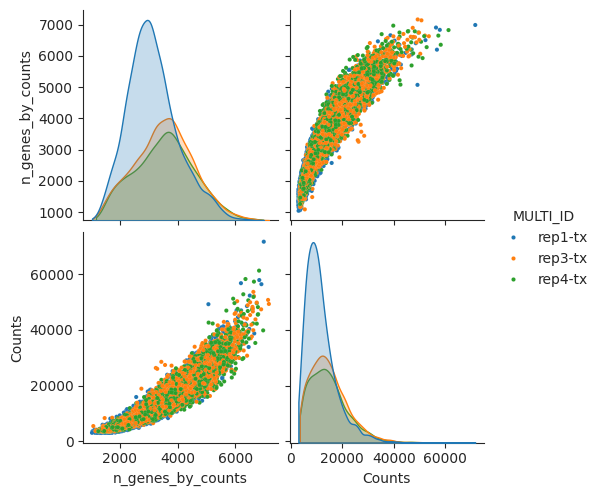

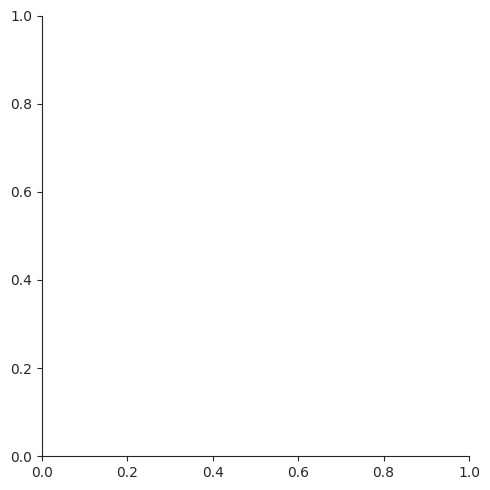

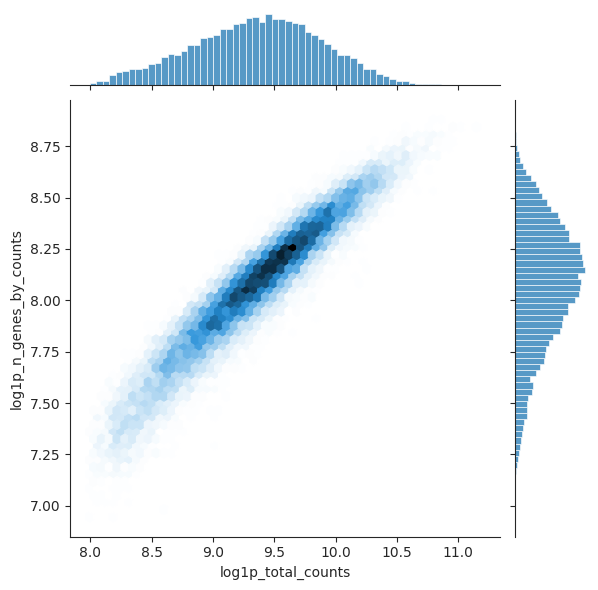

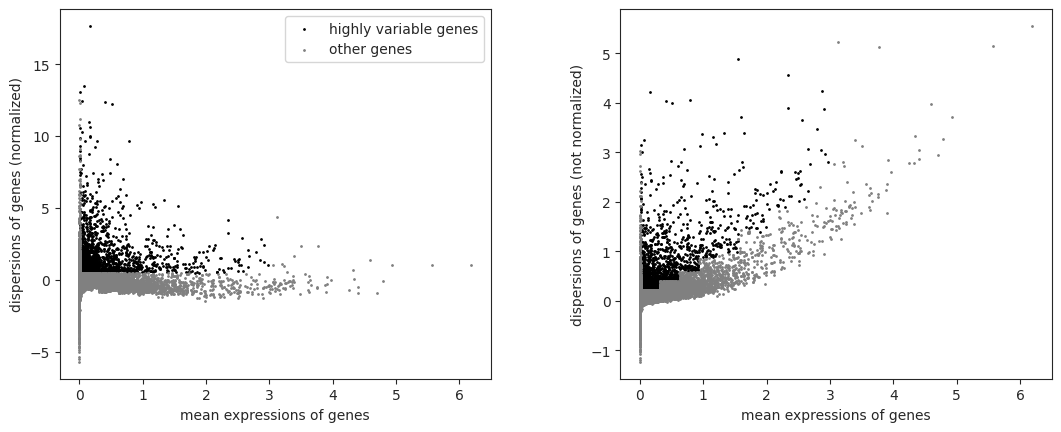


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing


Observations: 20715



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%              140.0     0.007096           0.007071              73.396090   
50%             1447.0     0.078108           0.075207              93.014724   
75%             5511.0     0.357664           0.305765              99.324161   

     total_counts  log1p_total_counts     means  dispersions  \
25%         147.0            4.997212  0.005499     0.031803   
50%        1618.0            7.389564  0.057966     0.094210   
75%        7409.0            8.910585  0.242712     0.202290   

     dispersions_norm      mean       std  
25%         -0.408919  0.003838  0.050577  
50%         -0.151074  0.040856  0.163196  
75%          0.174220  0.176657  0.326298  




	*** Detecting Mitochondrial, Ribosoma

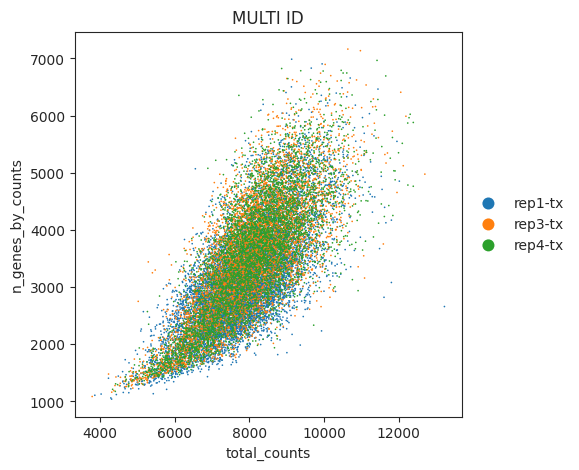

Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/crispr/crispr/processing/preprocessing.py", line 555, in perform_qc
    figs["pct_counts_kde"] = seaborn.displot(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 2218, in displot
    p.plot_univariate_density(**kde_kws)
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 930, in plot_univariate_density
    densities = self._compute_univariate_density(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/distributions.py", line 325, in _compute_univariate_density
    for sub_vars, sub_data in self.iter_data("hue", from_comp_data=True):
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/_base.py", line 938, in iter_data
    iter_keys = itertools.product(*grouping_keys)
TypeError: 'NoneType' object is not

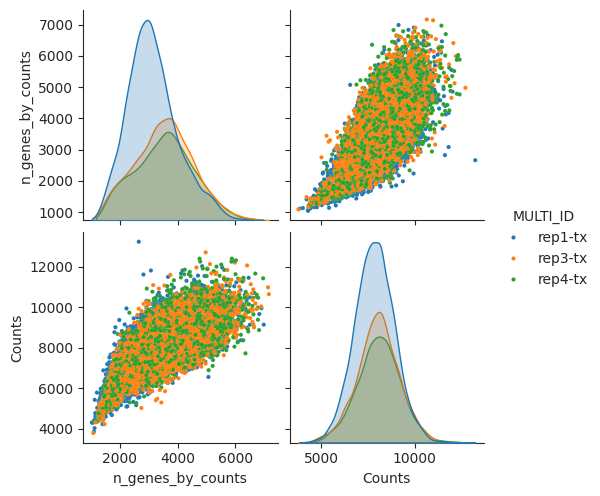

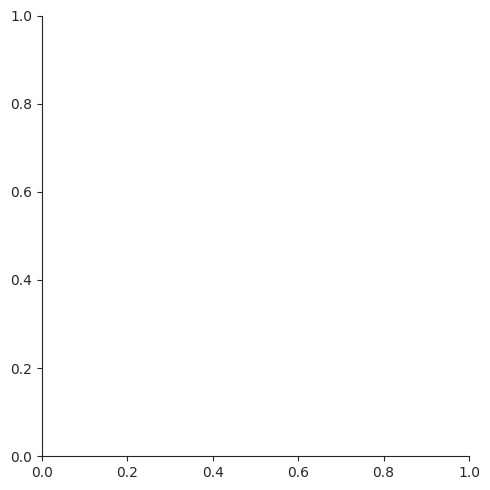

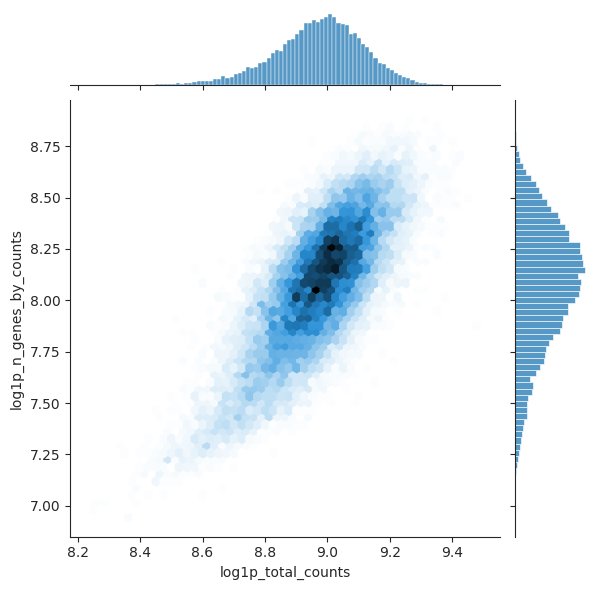

In [4]:
_ = self.preprocess()

# Clustering

## UMAP



Un-used Keyword Arguments: {'assay': 'rna', 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': 'MULTI_ID', 'col_batch': 'MULTI_ID', 'col_subject': None, 'col_condition': 'target_gene', 'col_num_umis': 'num_umis', 'col_target_genes': 'target_gene', 'col_perturbed': 'perturbed', 'col_guide_rna': 'guide', 'col_guide_split': 'guide_split', 'key_control': 'Control', 'key_treatment': 'KO', 'key_nonperturbed': 'NP'}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


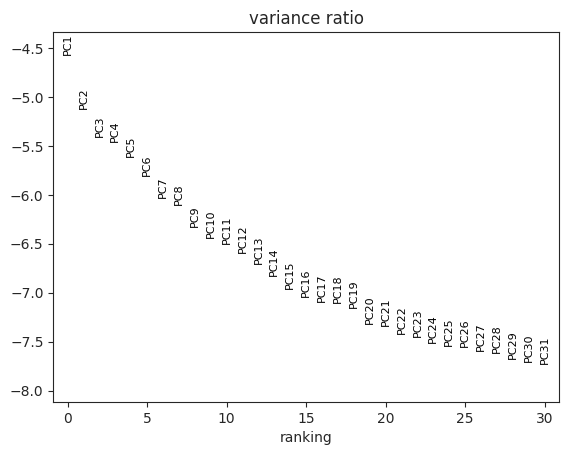

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'col_target_genes' as categorical
... storing 'col_perturbed' as categorical
... storing 'col_guide_rna' as categorical
... storing 'col_guide_split' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


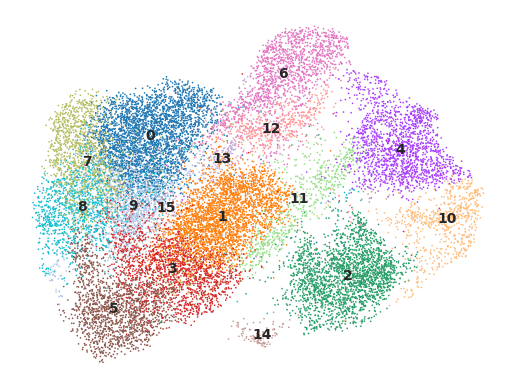

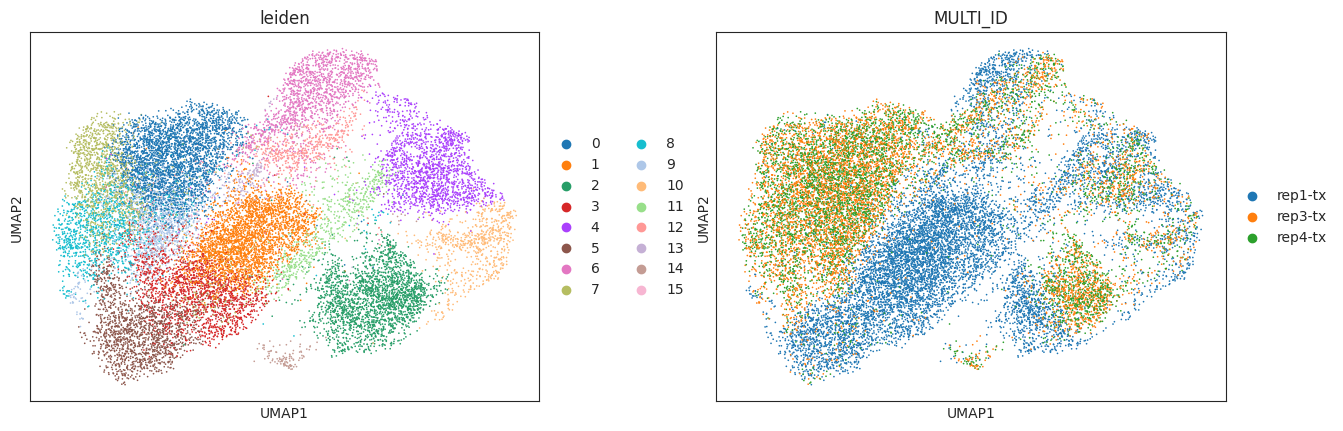

In [5]:
_ = self.cluster()

## Annotation

🔬 Input data has 20715 cells and 18649 genes
🔗 Matching reference genes in the model
🧬 4647 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


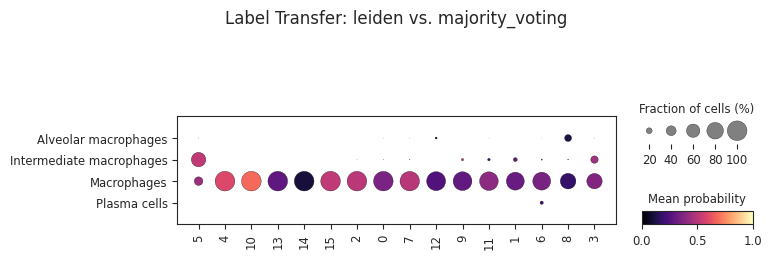

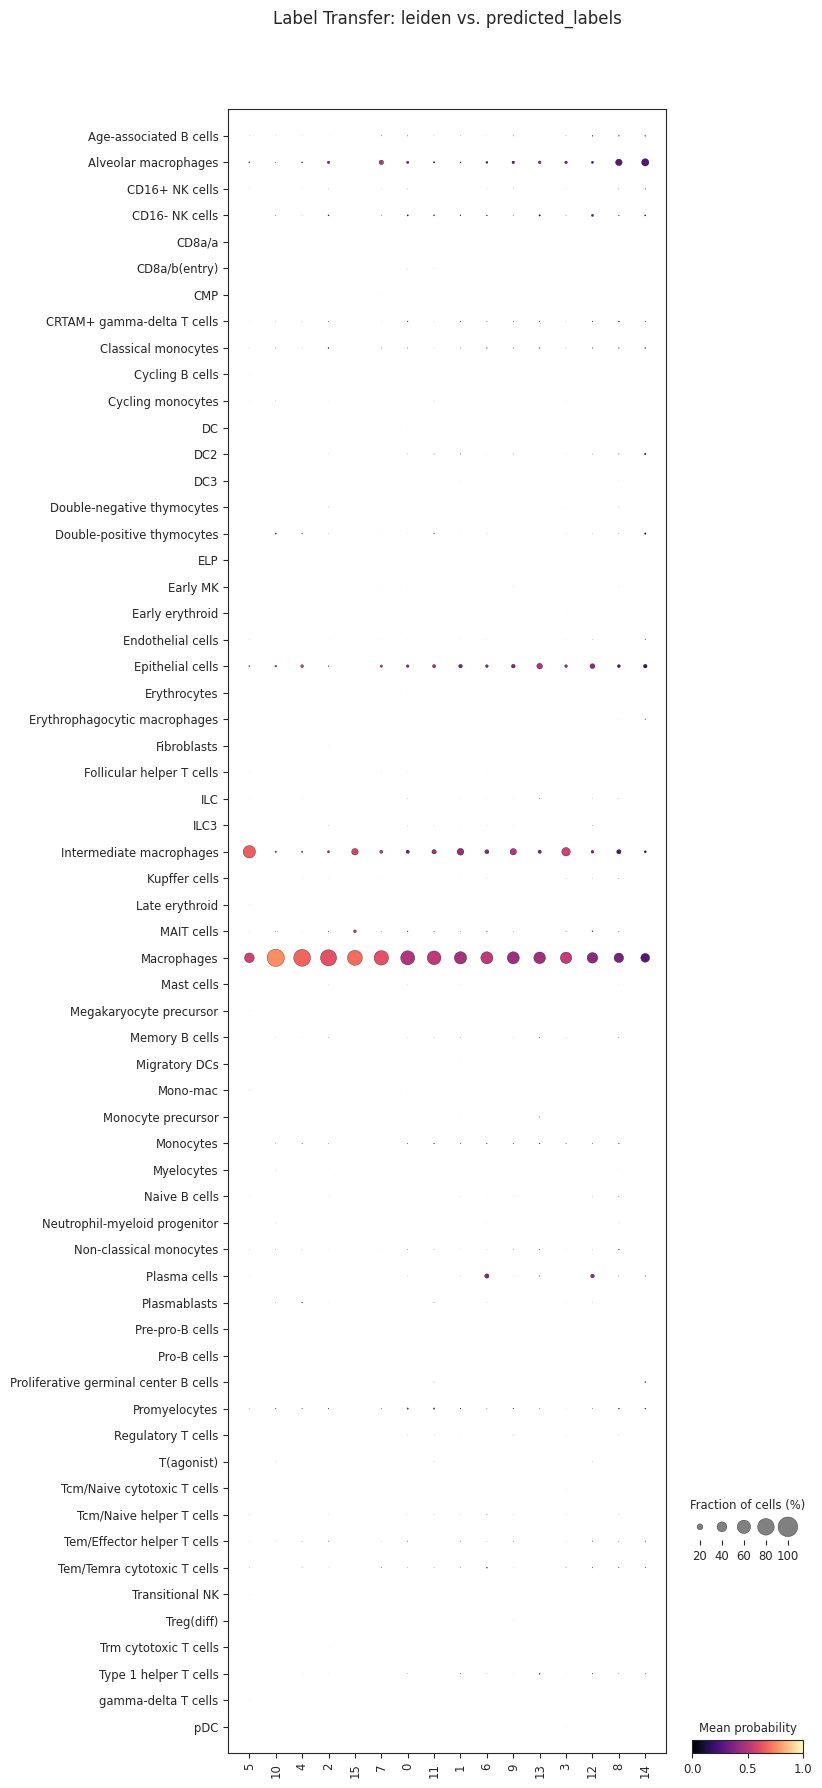

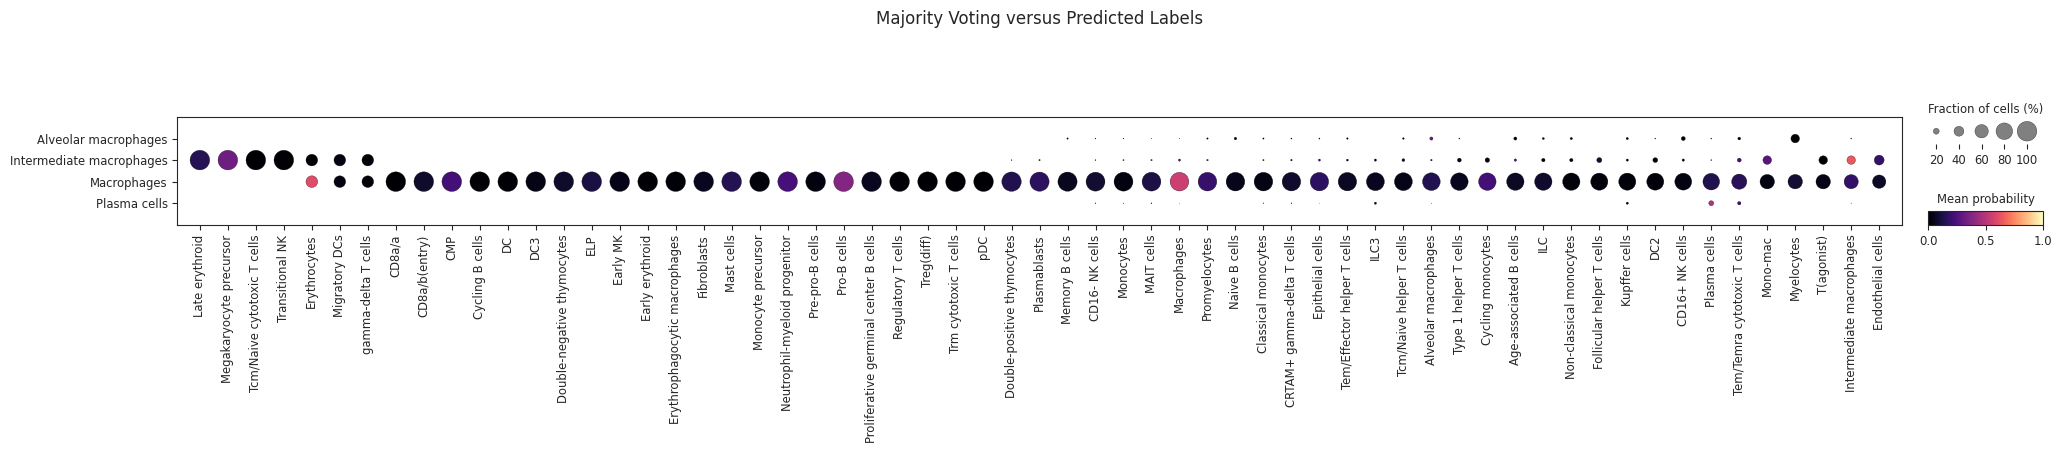

... storing 'kws_pca' as categorical
... storing 'kws_neighbors' as categorical
... storing 'kws_umap' as categorical
... storing 'kws_cluster' as categorical
... storing 'resolution' as categorical


NameError: name 're_ix' is not defined

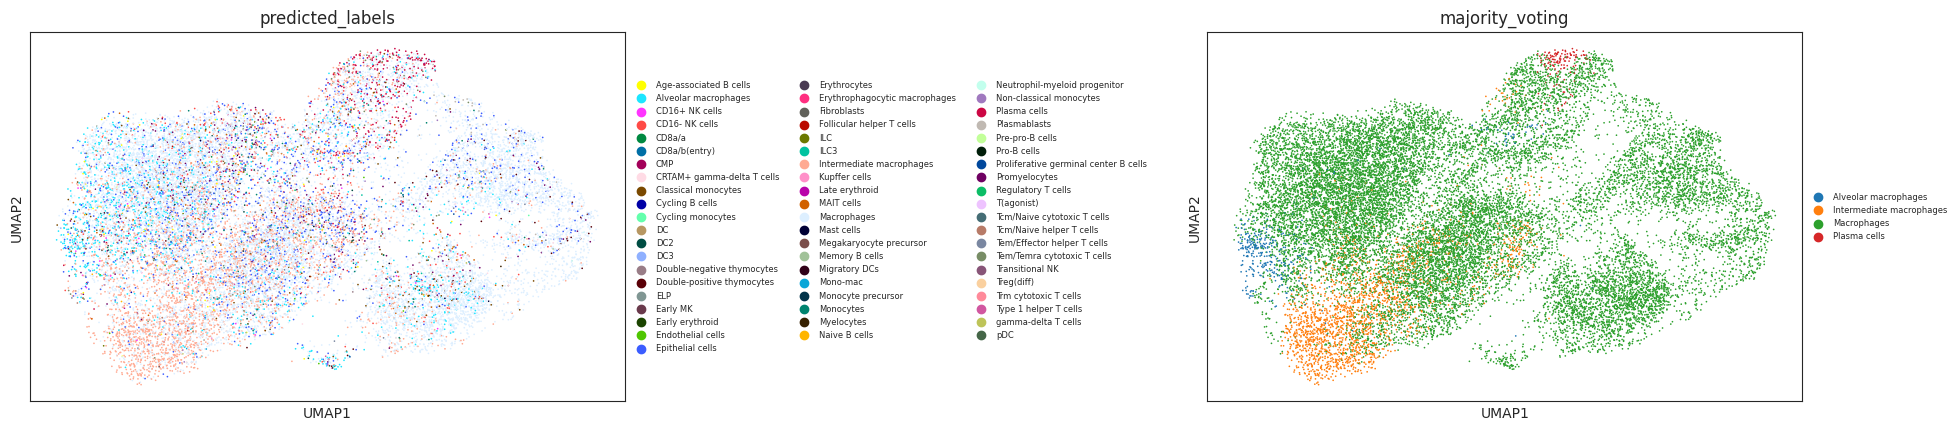

In [15]:
_ = self.annotate_clusters("Immune_All_Low.pkl")

# Analyses

## Distance Metrics

In [73]:
%%time

dist = self.compute_distance("edistance", n_jobs=4, alpha=0.00015,
                             key_condition=self._keys["key_control"],
                             kws_plot=dict(robust=False, figsize=(10, 10)))

Output()

Output()